# Load and clean data

In [7]:
#import libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 


In [5]:
#look at data
df = pd.read_csv('ExclusionData.csv')
df.head()

,pid,date,duration,socialmedia,condition,exclusion_coding,situation,wordcounts,agency_coding,situations_coding,...,anxiety.score,anxiety.cat,anxiety.norm,anxiety.bcase,anxiety.case,connectedness.c,assurance.c,selfesteem.c,fbattitude.c,fbtruth.c
0,1253389499,4/13/18 07:35,1003,Yes,Social avoidance,Social avoidance,I was invited to a family gathering and i feel...,66,Self,Personal reasons,...,14,Case,0,0,1,4.250,2.375,4.1,1.000000,1.166667
1,1296773023,2/16/18 15:37,896,No,Social avoidance,Social avoidance,I hate alcohol. So I avoid going to such event...,31,Self,Substance use,...,7,Normal,1,0,0,4.625,4.375,6.0,6.666667,4.833333
2,1326721511,2/17/18 19:43,890,No,Social avoidance,Social avoidance,i was sick and didnt feel like going out or do...,25,Other,Constraints,...,11,Case,0,0,1,3.375,4.125,NaN,3.166667,3.000000
3,1365964517,2/27/18 21:32,606717,Yes,Social exclusion,Social exclusion,My family talking about subjects that just don...,42,Them,Excluded,...,4,Normal,1,0,0,NaN,NaN,NaN,6.666667,4.000000
4,1412053729,2/18/18 10:56,6314,Yes,Social exclusion,Social exclusion,Left out from a group invite to.play cards and...,50,Them,Not invited,...,17,Case,0,0,1,5.125,5.875,4.4,6.500000,4.166667


In [8]:
#check types
df.dtypes

pid                  int64
date                object
duration             int64
socialmedia         object
condition           object
                    ...   
connectedness.c    float64
assurance.c        float64
selfesteem.c       float64
fbattitude.c       float64
fbtruth.c          float64
Length: 181, dtype: object

In [9]:
#check for missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

pid
False    228
Name: pid, dtype: int64

date
False    228
Name: date, dtype: int64

duration
False    228
Name: duration, dtype: int64

socialmedia
False    228
Name: socialmedia, dtype: int64

condition
False    228
Name: condition, dtype: int64

exclusion_coding
False    228
Name: exclusion_coding, dtype: int64

situation
False    228
Name: situation, dtype: int64

wordcounts
False    228
Name: wordcounts, dtype: int64

agency_coding
False    228
Name: agency_coding, dtype: int64

situations_coding
False    228
Name: situations_coding, dtype: int64

behavior
False    225
True       3
Name: behavior, dtype: int64

behavior_coding
False    177
True      51
Name: behavior_coding, dtype: int64

facebook
False    228
Name: facebook, dtype: int64

instagram
False    228
Name: instagram, dtype: int64

twitter
False    228
Name: twitter, dtype: int64

snapchat
False    228
Name: snapchat, dtype: int64

pinterest
False    228
Name: pinterest, dtype: int64

tumblr
False    228
Name: tumblr, 

Name: arousal.c, dtype: int64

dominance.c
False    228
Name: dominance.c, dtype: int64

depression.score
False    228
Name: depression.score, dtype: int64

depression.cat
False    228
Name: depression.cat, dtype: int64

depression.norm
False    228
Name: depression.norm, dtype: int64

depression.bcase
False    228
Name: depression.bcase, dtype: int64

depression.case
False    228
Name: depression.case, dtype: int64

anxiety.score
False    228
Name: anxiety.score, dtype: int64

anxiety.cat
False    228
Name: anxiety.cat, dtype: int64

anxiety.norm
False    228
Name: anxiety.norm, dtype: int64

anxiety.bcase
False    228
Name: anxiety.bcase, dtype: int64

anxiety.case
False    228
Name: anxiety.case, dtype: int64

connectedness.c
False    227
True       1
Name: connectedness.c, dtype: int64

assurance.c
False    227
True       1
Name: assurance.c, dtype: int64

selfesteem.c
False    226
True       2
Name: selfesteem.c, dtype: int64

fbattitude.c
False    227
True       1
Name: fbattitud

In [10]:
#drop missing values
df.dropna(inplace=True)

In [11]:
#replace categorical variable with numeric values
df['exclusion_coding'].replace(to_replace=['Social avoidance','Social exclusion'], value=[0,1],inplace=True)

In [12]:
#check 
df.head()

,pid,date,duration,socialmedia,condition,exclusion_coding,situation,wordcounts,agency_coding,situations_coding,...,anxiety.score,anxiety.cat,anxiety.norm,anxiety.bcase,anxiety.case,connectedness.c,assurance.c,selfesteem.c,fbattitude.c,fbtruth.c
0,1253389499,4/13/18 07:35,1003,Yes,Social avoidance,0,I was invited to a family gathering and i feel...,66,Self,Personal reasons,...,14,Case,0,0,1,4.250,2.375,4.1,1.000000,1.166667
1,1296773023,2/16/18 15:37,896,No,Social avoidance,0,I hate alcohol. So I avoid going to such event...,31,Self,Substance use,...,7,Normal,1,0,0,4.625,4.375,6.0,6.666667,4.833333
4,1412053729,2/18/18 10:56,6314,Yes,Social exclusion,1,Left out from a group invite to.play cards and...,50,Them,Not invited,...,17,Case,0,0,1,5.125,5.875,4.4,6.500000,4.166667
5,1431419812,2/28/18 06:46,1175,No,Social avoidance,0,During a business trip my co-workers were on t...,42,Self,Other priorities,...,4,Normal,1,0,0,2.000,3.125,3.7,4.166667,3.333333
6,1432853840,2/27/18 22:38,1016,Yes,Social exclusion,1,My friends went to a concert without me. I fel...,26,Them,Not invited,...,9,Borderline Case,0,1,0,1.750,3.250,3.9,3.166667,3.000000


# Model

In [13]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
X = df[['anxiety.score', 'age', 'compound', 'word_count', 'emotion_words', 'passive_words','counterfactual_words', 'third_person_words', 'first_person_words', 'depression.score']]
y = df['exclusion_coding']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =4)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#build model
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train_scaled,y_train)

In [16]:
#make predicted values
y_pred=lr.predict(X_test_scaled)

In [17]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [18]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
79.41%



In [19]:
#cross val 
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
print(cross_val_score(lr, X, y))

[0.70588235 0.85294118 0.82352941 0.79411765 0.67647059]


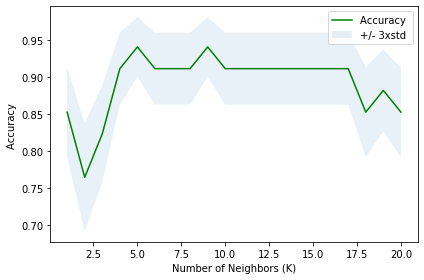

In [20]:
# KNN (k nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier

mean_acc=np.zeros(20)
std_acc = np.zeros(20)
for i in range(1,21):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled,y_train)
    y_pred=knnmodel.predict(X_test_scaled)
    mean_acc[i-1]=metrics.accuracy_score(y_test,y_pred)
    std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,21),mean_acc,'g')
plt.fill_between(range(1,21),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
print( "Highest accuracy for KNN:", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Highest accuracy for KNN: 0.9411764705882353 with k= 5


In [22]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), KNeighborsClassifier())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
print('\nPrediction accuracy for the standardized test dataset with PCA for KNN')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA for KNN
70.59%



In [23]:
print(cross_val_score(knnmodel, X, y))

[0.32352941 0.64705882 0.52941176 0.55882353 0.44117647]


In [24]:
#SVM (support vector machine)
from sklearn import svm
svm=svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
b_pred=svm.predict(X_test_scaled)
acc = metrics.accuracy_score(y_test,y_pred)
print("Highest Accuracy for SVM:", acc)

Highest Accuracy for SVM: 0.8529411764705882


In [27]:
print(cross_val_score(svm, X, y))

[0.5        0.52941176 0.52941176 0.52941176 0.52941176]


In [28]:
#Perceptron
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=0)
# Train the perceptron
ppn.fit(X_train_scaled, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), Perceptron())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)
print('\nPrediction accuracy for the standardized test dataset with PCA for PT')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA for PT
64.71%



In [30]:
print(cross_val_score(ppn, X, y))

[0.58823529 0.64705882 0.79411765 0.64705882 0.52941176]
